In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

In [3]:
data = io.loadmat('c2p3.mat')
counts = data['counts']
stim = data['stim'] 
print(counts.shape)
print(stim.shape)

(32767, 1)
(16, 16, 32767)


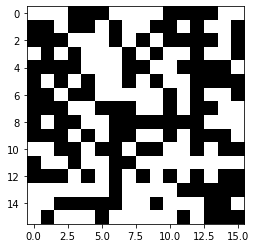

In [4]:
plt.imshow(stim[:,:,1000], cmap='Greys')

## PART A

In [5]:
sta_images = np.zeros((10,16,16))

for spk in range(len(counts)-10):
    if counts[spk+10]>0:
        for i in range(10):
            sta_images[i,:,:] += stim[:,:,spk+i]*counts[spk+10]

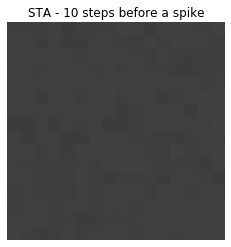

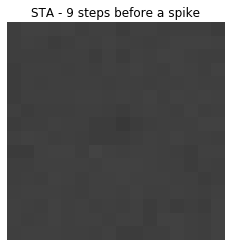

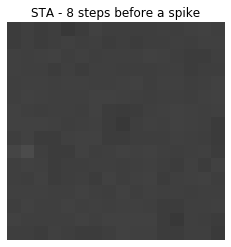

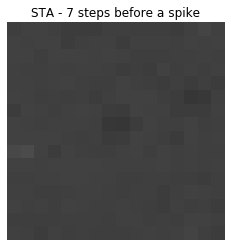

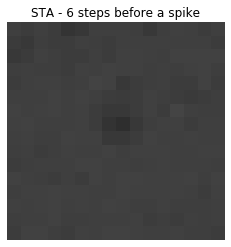

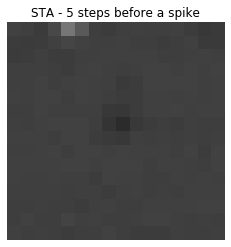

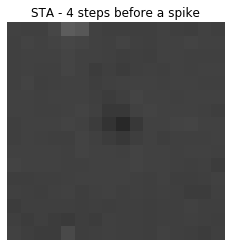

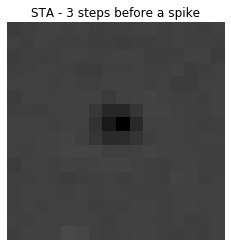

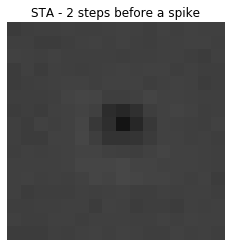

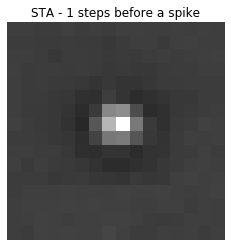

In [6]:
min_sta_val = np.min(sta_images)
max_sta_val = np.max(sta_images)

for i in range(sta_images.shape[0]):
    plt.imshow(sta_images[i,:,:], cmap='gray', vmin=min_sta_val, vmax=max_sta_val)
    plt.title('STA - %d steps before a spike' % (10 -(i)))
    plt.axis('off')
    plt.show()


## Part B

(10, 16, 16)


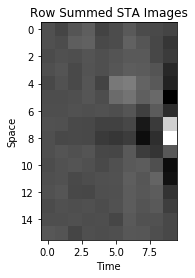

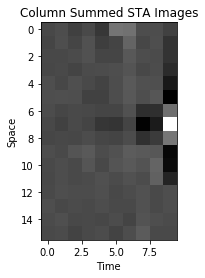

In [7]:
print(sta_images.shape)
sta_sum = np.sum(sta_images,axis=1).T
plt.imshow(sta_sum, cmap='gray')
plt.title('Row Summed STA Images')
plt.xlabel('Time')
plt.ylabel('Space')
plt.show()

sta_sum = np.sum(sta_images,axis=2).T
plt.imshow(sta_sum, cmap='gray')
plt.title('Column Summed STA Images')
plt.xlabel('Time')
plt.ylabel('Space')
plt.show()

## Part C

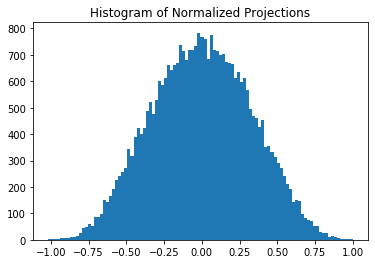

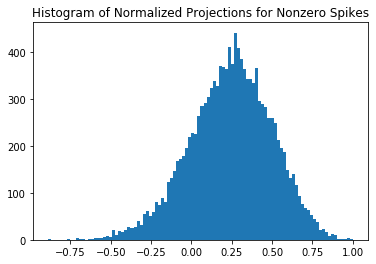

In [8]:
projections = []

for spk in range(len(counts)-1):
    projections.append(np.sum(stim[:,:,spk]*sta_images[9,:,:]))
projections /= np.max(projections)

plt.hist(projections, bins=100)
plt.title('Histogram of Normalized Projections')
plt.show()

nonzero_projections = []

for spk in range(len(counts)-1):
    if counts[spk+1]>0:
            nonzero_projections.append(np.sum(stim[:,:,spk]*sta_images[9,:,:]))
nonzero_projections /= np.max(nonzero_projections)
plt.hist(nonzero_projections, bins=100)
plt.title('Histogram of Normalized Projections for Nonzero Spikes')
plt.show()

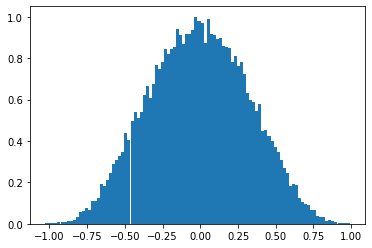

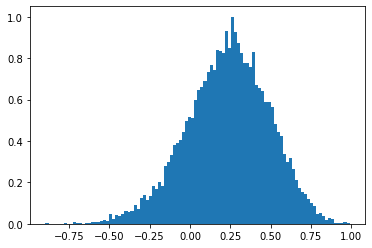

In [9]:
projections = []

for spk in range(len(counts)-1):
    projections.append(np.sum(stim[:,:,spk]*sta_images[9,:,:]))
projections /= np.max(projections)

hist = np.histogram(projections, bins=100)
hist_nor = hist[0] / np.max(hist[0])
plt.bar(hist[1][0:len(hist[1])-1], hist_nor, width=.02)
plt.show()

nonzero_projections = []

for spk in range(len(counts)-1):
    if counts[spk+1]>0:
            nonzero_projections.append(np.sum(stim[:,:,spk]*sta_images[9,:,:]))
nonzero_projections /= np.max(nonzero_projections)

hist = np.histogram(nonzero_projections, bins=100)
hist_nor = hist[0] / np.max(hist[0])
plt.bar(hist[1][0:len(hist[1])-1], hist_nor, width=.02, )
plt.show()

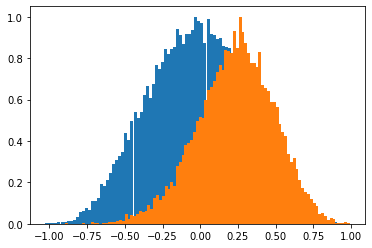

In [10]:
hist = np.histogram(projections, bins=100)
hist_nor = hist[0] / np.max(hist[0])
plt.bar(hist[1][0:len(hist[1])-1], hist_nor, width=.02)
hist = np.histogram(nonzero_projections, bins=100)
hist_nor = hist[0] / np.max(hist[0])
plt.bar(hist[1][0:len(hist[1])-1], hist_nor, width=.02)
plt.show()

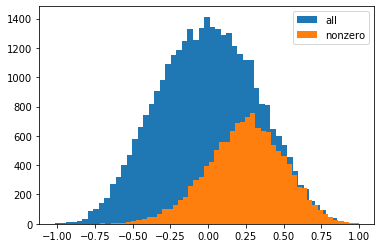

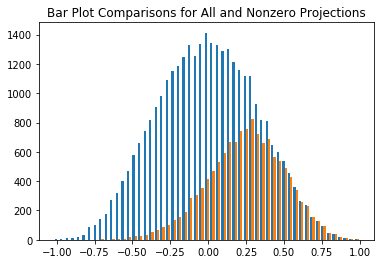

In [13]:
weights = np.ones_like(projections)
weights_2 = np.ones_like(nonzero_projections)


plt.hist(np.asarray(projections), bins=55, label='all',  weights=weights)
plt.hist(np.asarray(nonzero_projections), bins=55, label='nonzero', weights=weights_2)
plt.legend(loc='upper right')
plt.show()

plt.hist([np.asarray(projections),np.asarray(nonzero_projections)],bins=55)
plt.title('Bar Plot Comparisons for All and Nonzero Projections')
plt.show()
